In [1]:

import pandas as pd 
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:

#Supress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

In [3]:

# Importing the dataset

data = pd.read_csv('XYZCorp_LendingData.txt',delimiter='\t', low_memory=False)

In [4]:
# make the copy of orignal data set

data_copy = data.copy(deep=True)

In [5]:
data.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
print(data.shape)


(855969, 73)


# Check Missing Value


In [7]:

total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(32)

,Total,Percent
dti_joint,855529,99.948596
verification_status_joint,855527,99.948363
annual_inc_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
total_bal_il,842681,98.447607
inq_last_12m,842681,98.447607
open_acc_6m,842681,98.447607
open_il_6m,842681,98.447607
open_il_24m,842681,98.447607


# Visualising the missing values in each column for better understanding:


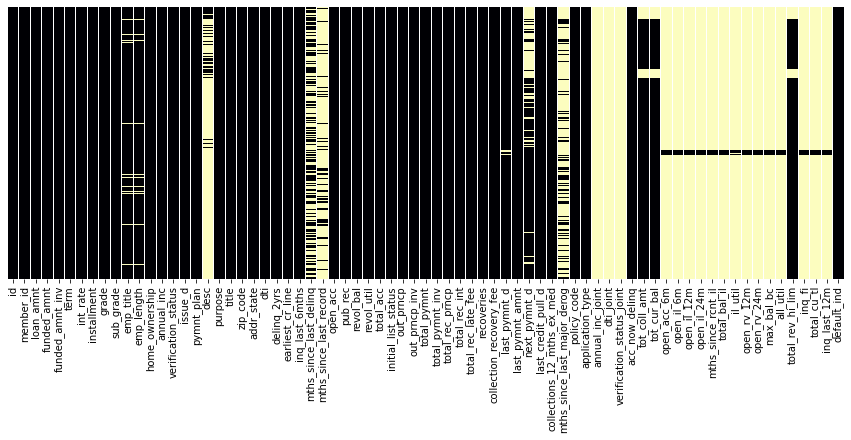

In [8]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap="magma" )

# Drop Missing Column

In [9]:

for i in data.columns:
    if missing_data.loc[i,'Percent'] >= 50:
        data=data.drop(i,axis=1)

In [10]:
data.shape


(855969, 52)

# Visualising the missing values in each column after dropping the variables¶


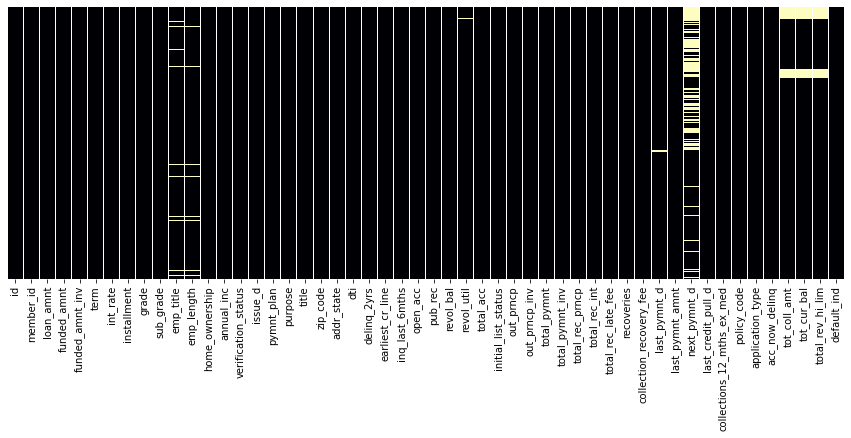

In [11]:

plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap="magma" )

# Duplicate records 

In [12]:
data.duplicated().value_counts()

False    855969
dtype: int64

# Data Types for all variables

In [13]:
print(data.dtypes)


id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec     

In [14]:
sns.countplot


<function seaborn.categorical.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

# Let us see how many Object type features are actually Categorical

In [15]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                        2
grade                       7
sub_grade                  35
emp_title              290912
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   103
pymnt_plan                  2
purpose                    14
title                   60991
zip_code                  931
addr_state                 51
earliest_cr_line          697
initial_list_status         2
last_pymnt_d               97
next_pymnt_d                3
last_credit_pull_d        102
application_type            2
dtype: int64

# Int columns

In [16]:
num_col=[]

for x in data.columns[:]:
    if (data[x].dtype=='int64') | (data[x].dtype=='float64'):
        num_col.append(x)

print(num_col)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind']


# Box Plot

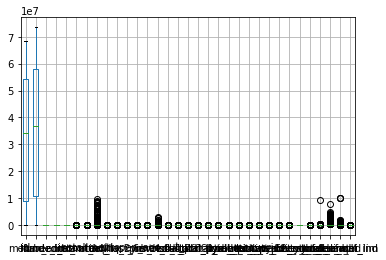

In [17]:

data.boxplot()

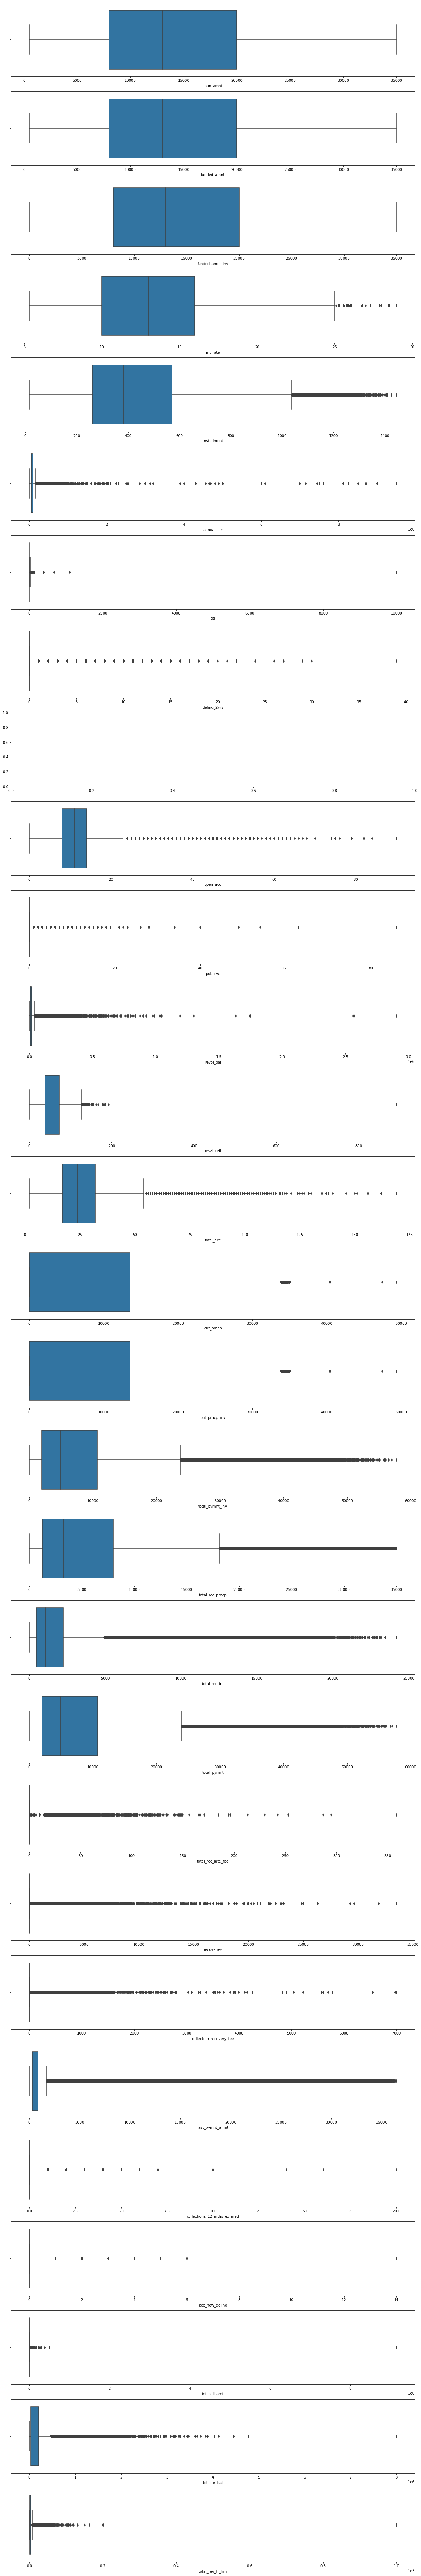

In [18]:
fig, axs = plt.subplots(29,figsize=(20,130))

plt1 = sns.boxplot(data['loan_amnt'], ax = axs[0])
plt2 = sns.boxplot(data['funded_amnt'],ax=axs[1])
plt3 = sns.boxplot(data['funded_amnt_inv'],ax=axs[2])
plt4 = sns.boxplot(data['int_rate'],ax=axs[3])
plt5 = sns.boxplot(data['installment'],ax=axs[4])
plt6 = sns.boxplot(data['annual_inc'],ax=axs[5])
plt7 = sns.boxplot(data['dti'],ax=axs[6])
plt8 = sns.boxplot(data['delinq_2yrs'],ax=axs[7])
#plt9 = sns.boxplot(data['mths_since_last_delinq'],ax=axs[8])
plt10 = sns.boxplot(data['open_acc'],ax=axs[9])
plt11 = sns.boxplot(data['pub_rec'], ax = axs[10])
plt12 = sns.boxplot(data['revol_bal'],ax=axs[11])
plt13 = sns.boxplot(data['revol_util'],ax=axs[12])
plt14 = sns.boxplot(data['total_acc'],ax=axs[13])
plt15 = sns.boxplot(data['out_prncp'],ax=axs[14])
plt16 = sns.boxplot(data['out_prncp_inv'],ax=axs[15])
plt17 = sns.boxplot(data['total_pymnt_inv'],ax=axs[16])
plt18 = sns.boxplot(data['total_rec_prncp'],ax=axs[17])
plt19 = sns.boxplot(data['total_rec_int'],ax=axs[18])
plt20 = sns.boxplot(data['total_pymnt'],ax=axs[19])
plt21 = sns.boxplot(data['total_rec_late_fee'], ax = axs[20])
plt22 = sns.boxplot(data['recoveries'],ax=axs[21])
plt23 = sns.boxplot(data['collection_recovery_fee'],ax=axs[22])
plt24 = sns.boxplot(data['last_pymnt_amnt'],ax=axs[23])
plt25 = sns.boxplot(data['collections_12_mths_ex_med'],ax=axs[24])
plt26 = sns.boxplot(data['acc_now_delinq'],ax=axs[25])
plt27 = sns.boxplot(data['tot_coll_amt'],ax=axs[26])
plt28 = sns.boxplot(data['tot_cur_bal'],ax=axs[27])
plt29 = sns.boxplot(data['total_rev_hi_lim'],ax=axs[28])



#plt.tight_layout()
plt.show()

# Data visualization 

In [19]:
data['default_ind'].value_counts()


0    809502
1     46467
Name: default_ind, dtype: int64

In [20]:
Non_Default = round(data['default_ind'].value_counts()[0]/len(data) * 100, 2)

Default = round(data['default_ind'].value_counts()[1]/len(data) * 100, 2)

print('Non_Default Customer : {} % of the dataset'.format(Non_Default))
print('Default Customer : {} % of the dataset'.format(Default))

Non_Default Customer : 94.57 % of the dataset
Default Customer : 5.43 % of the dataset


Text(0.5, 1.0, 'Class Distribution \n (0 : Non_Default_customer   ||    1 : Default Customer)')

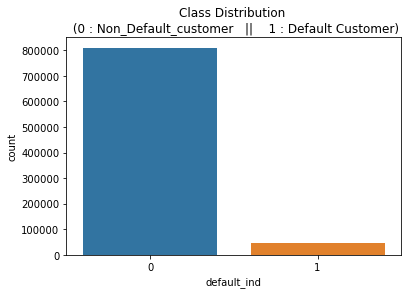

In [21]:
sns.countplot('default_ind', data=data)
plt.title('Class Distribution \n (0 : Non_Default_customer   ||    1 : Default Customer)')

# TermsDist.

Text(0, 0.5, 'Count')

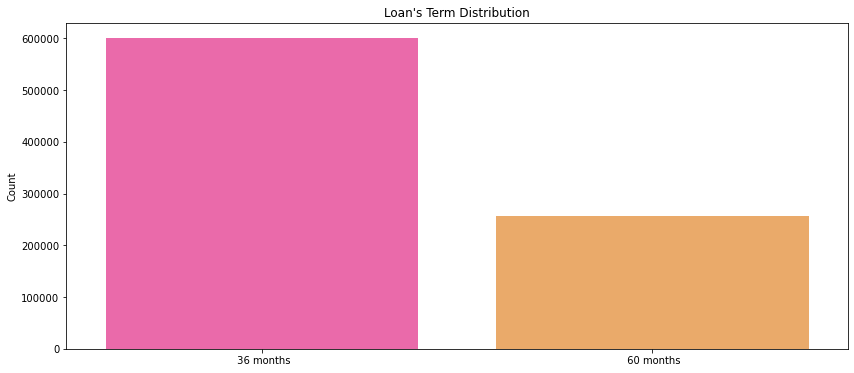

In [22]:
plt.figure(figsize=(14, 6))
sns.barplot(y=data.term.value_counts(), x=data.term.value_counts().index, palette='spring')
plt.xticks(rotation=0)
plt.title("Loan's Term Distribution")
plt.ylabel("Count")

# Amount Dist

Text(0.5, 1.0, 'Funded Amount Distribution')

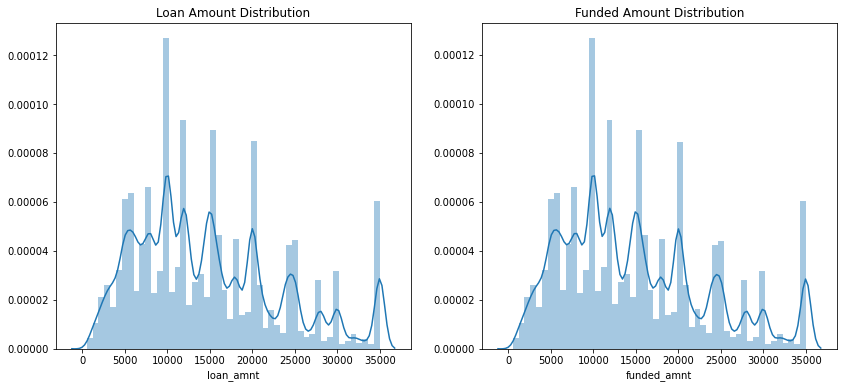

In [23]:

fig, ax = plt.subplots(1, 2, figsize=(14,6))


sns.distplot(data['loan_amnt'], ax=ax[0])
ax[0].set_title("Loan Amount Distribution")

sns.distplot(data['funded_amnt'], ax=ax[1])
ax[1].set_title("Funded Amount Distribution")

Text(0.5, 1.0, 'Interest Rates Distribution')

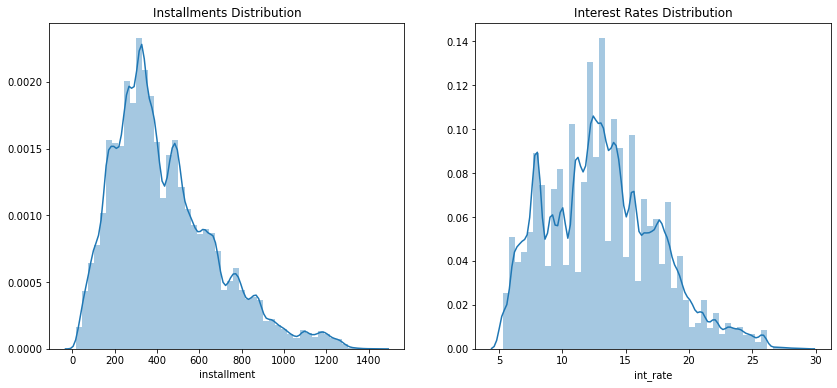

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))


sns.distplot(data['installment'], ax=ax[0])
ax[0].set_title("Installments Distribution")

sns.distplot(data['int_rate'], ax=ax[1])
ax[1].set_title("Interest Rates Distribution")

# Grade Count

Text(0.5, 1.0, 'Grade Count')

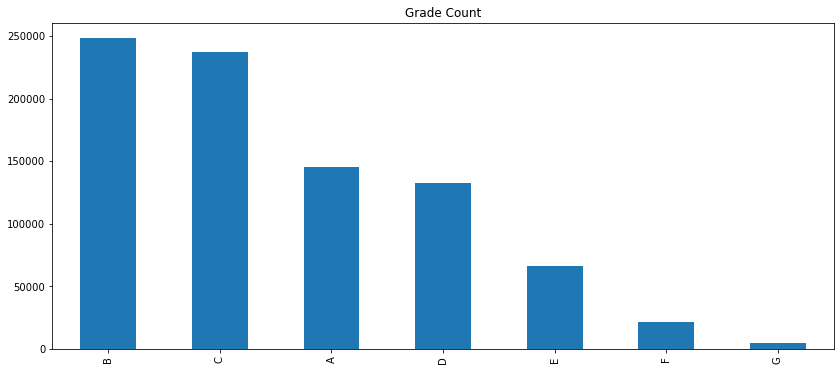

In [25]:
plt.figure(figsize=(14, 6))

data.grade.value_counts().plot(kind='bar').set_title('Grade Count')


It appears that B & C grade are the dominant ones

# Loan Purpose

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

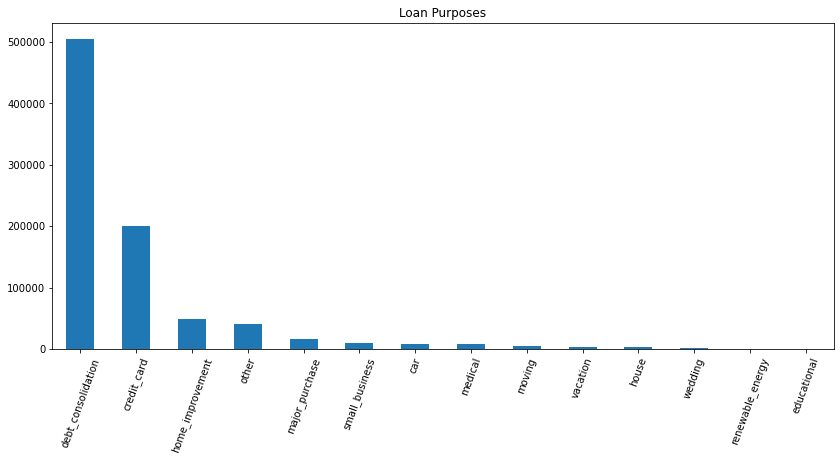

In [26]:
plt.figure(figsize=(14, 6))

data.purpose.value_counts().plot(kind='bar').set_title('Loan Purposes')
plt.xticks(rotation=70)


It appears that most of the loans are for debt_consolidation

Loan Amount Distribution BoxPlot


Text(0.5, 1.0, 'Term Duration')

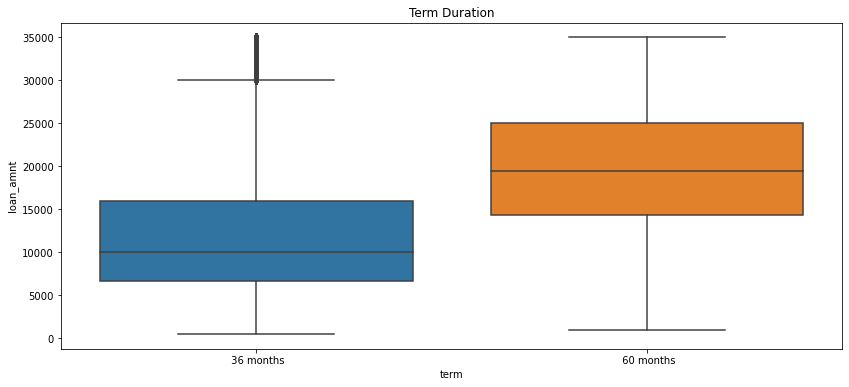

In [27]:
print("Loan Amount Distribution BoxPlot")
plt.figure(figsize=(14,6))
sns.boxplot(x=data.term, y=data.loan_amnt).set_title('Term Duration')

Text(0, 0.5, 'Loan Amount')

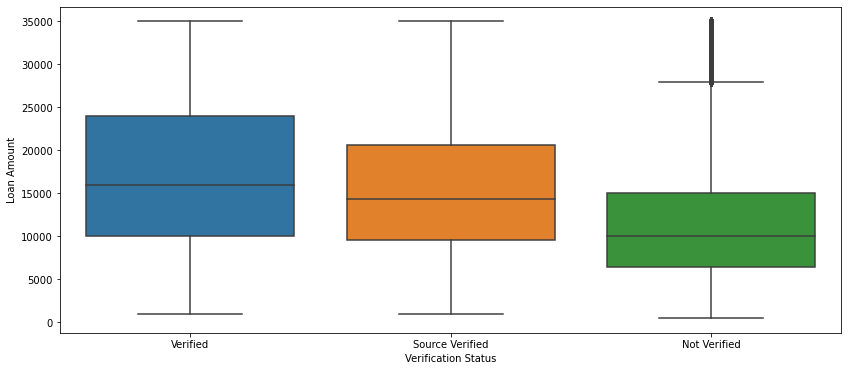

In [28]:
plt.figure(figsize=(14,6)) 

sns.boxplot(x=data.verification_status, y=data.loan_amnt)

plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

# Loan Amount by Verification Status

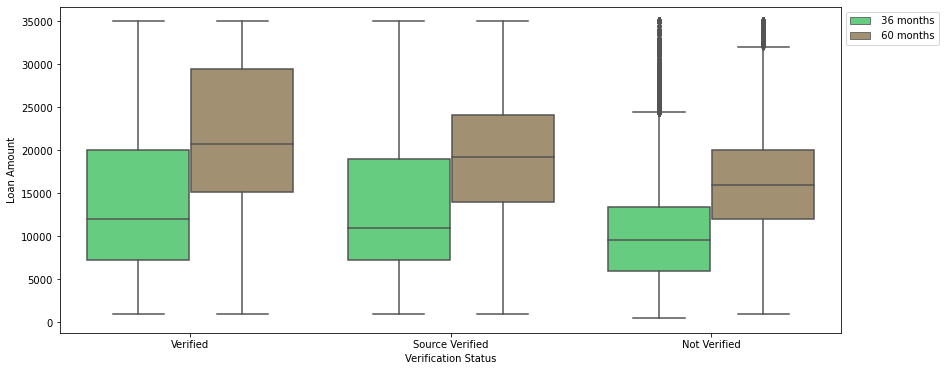

In [29]:
plt.figure(figsize=(14,6))

sns.boxplot(x=data.verification_status, y=data.loan_amnt, hue=data.term, palette="terrain")

plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

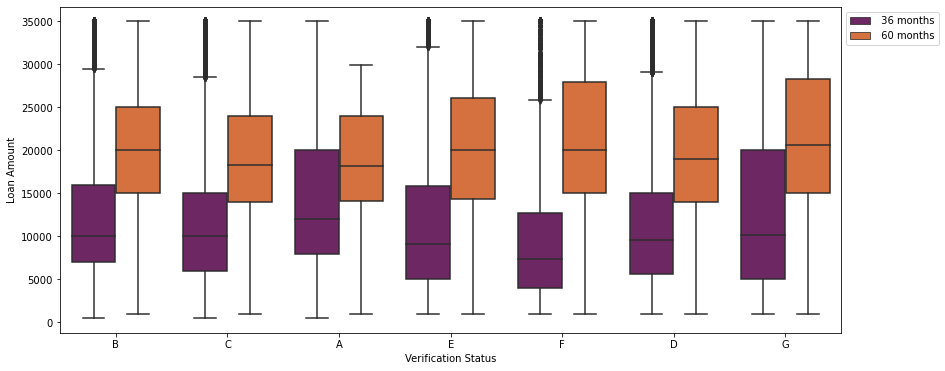

In [30]:
plt.figure(figsize=(14,6))

sns.boxplot(x=data.grade, y=data.loan_amnt, hue=data.term, palette="inferno")

plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

# Issue_d


Create a function that will split the issue_d varibale which is nothing but the The month which the loan was funded

In [31]:
def getMonth(x):
    return x.split('-')[0]


def getYear(x):
    return x.split('-')[1]


data['Month'] = data.issue_d.apply(getMonth)
data['Year'] = data.issue_d.apply(getYear)

In [32]:
data.shape

(855969, 54)

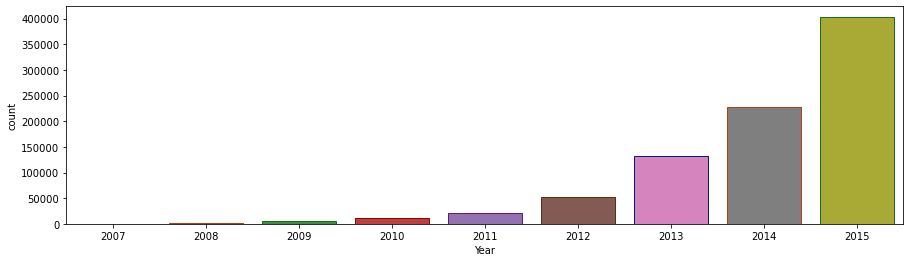

In [33]:
plt.figure(figsize=(15, 4))

sns.countplot(x="Year", data=data, edgecolor=sns.color_palette("dark", 6))

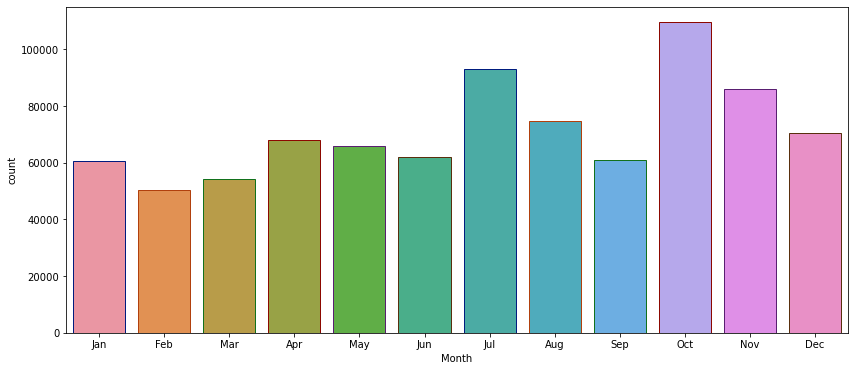

In [34]:
orderby = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(14, 6))

sns.countplot(x="Month", data=data, edgecolor=sns.color_palette("dark", 6), order=orderby)


Seems that October and July have the highest number of applications



# Loan Amount by Months

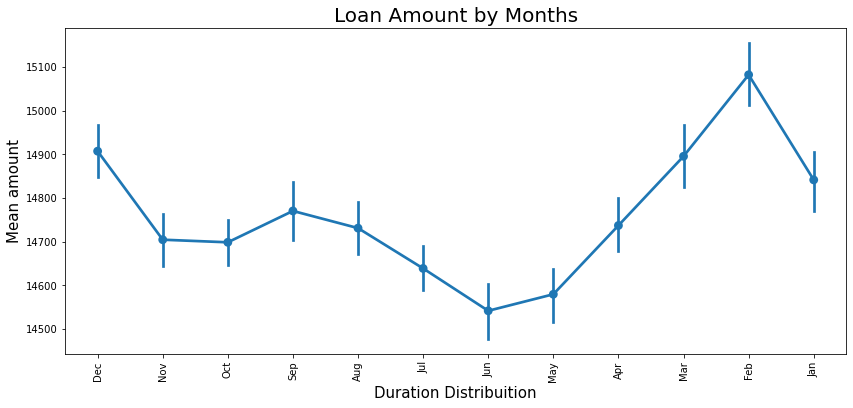

In [35]:
plt.figure(figsize = (14,6))

g = sns.pointplot(x='Month', y='loan_amnt',data=data)


g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)

g.set_title("Loan Amount by Months", fontsize=20)

plt.show()

# Loan Amount by Months and Grade

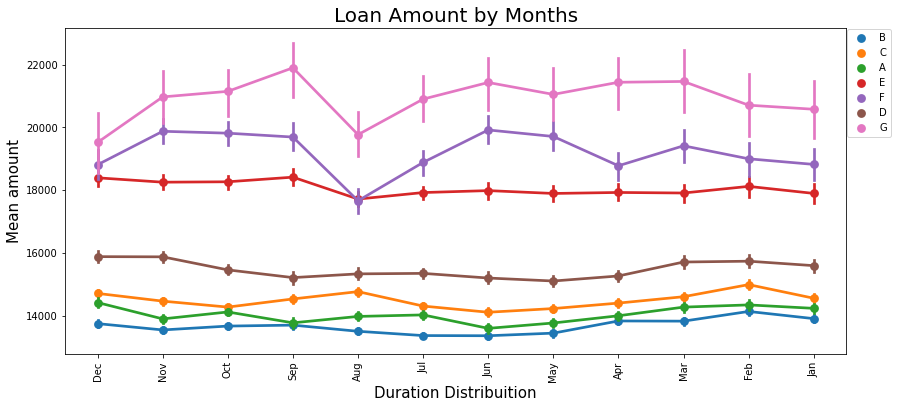

In [36]:
plt.figure(figsize = (14,6))

g = sns.pointplot(x='Month', y='loan_amnt', data=data, hue='grade')

g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)

g.set_title("Loan Amount by Months", fontsize=20)

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.10)

plt.show()


# Loan Amount by Months and term

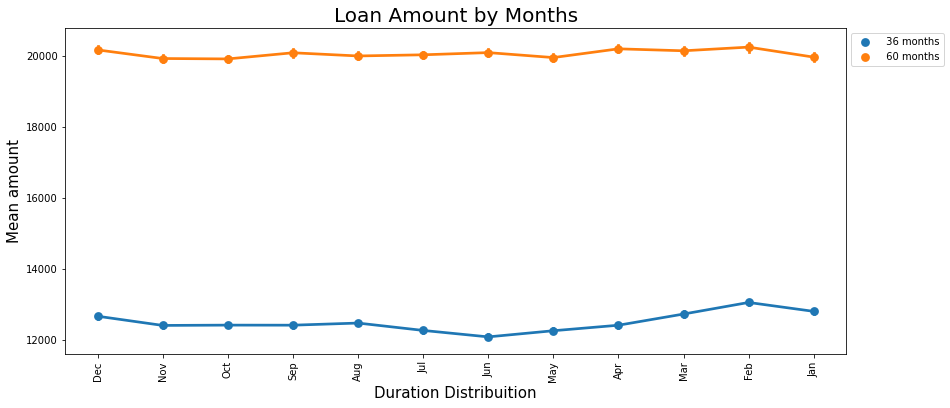

In [37]:
plt.figure(figsize = (14,6))

g = sns.pointplot(x='Month', y='loan_amnt',data=data, hue='term')

g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)

g.set_title("Loan Amount by Months", fontsize=20)

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

plt.show()

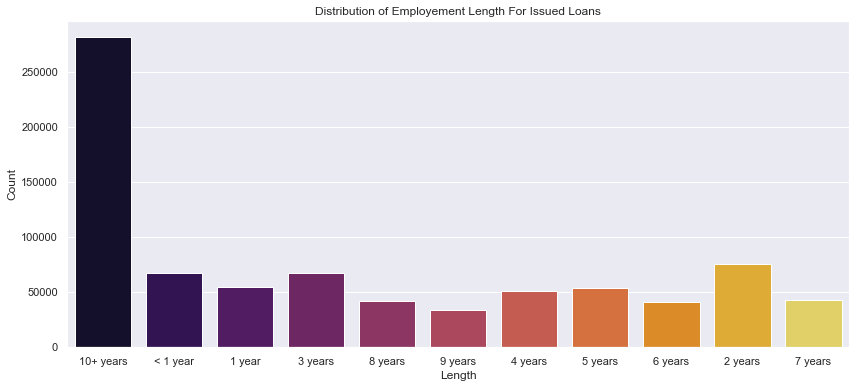

In [38]:
sns.set(rc={'figure.figsize':(14,6)})
sns.countplot(data['emp_length'],palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

Text(0, 0.5, 'Data type')

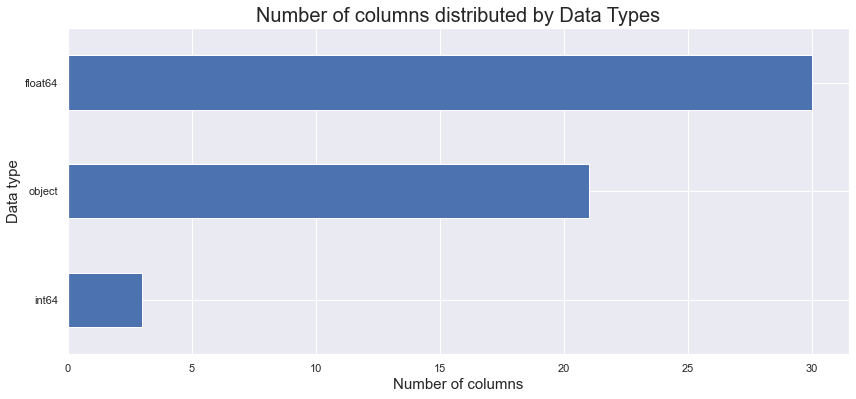

In [39]:
# Number of each type of column
data.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

# Export level 1

In [40]:
data.to_csv('level_1.csv')

In [41]:

# Importing the dataset
data = pd.read_csv('level_1.csv',index_col=0,low_memory=False)

In [42]:
data.shape

(855969, 54)

In [43]:
data.head(10)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,Dec,2011
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-2011,n,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,Jan-2016,170.08,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-2011,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,4.0,0.0,8221.0,87.5,4.0,f,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.00,Jan-2015,111.34,NaN,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-2011,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,11.0,0.0,5210.0,32.6,13.0,f,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-2012,152.39,NaN,Aug-2012,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,Dec,2011
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-2011,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-20

# Droping the Irrelevant Columns

In [44]:
# id variable because its a unique number
data=data.drop('id',axis=1)

# member_id variable because its a unique number
data=data.drop('member_id',axis=1)

# zip_code variable because its a unique number
data=data.drop('zip_code',axis=1)

# policy_code variable because it has same value for all observation
data=data.drop('policy_code',axis=1)

# payment_plan variable because it has same value for all observation
data=data.drop('pymnt_plan',axis=1)

# emp_title variable because it's a categorical varibale with (290912 level)
data=data.drop('emp_title',axis=1)

# last_credit_pull_d variable because it's a date varibale with (102 level)
data=data.drop('last_credit_pull_d',axis=1)

# title variable because it's a categorical varibale with (61000 level)
data=data.drop('title',axis=1)

# next_pymnt_d variable because 
# it's a date varibale with (3 level) and it contains 29% Missing info.
data=data.drop('next_pymnt_d',axis=1)

# earliest_cr_line variable because it's a date varibale with (697 level)
data=data.drop('earliest_cr_line',axis=1)

# addr_state variable for trail purpose (51 level)
data=data.drop('addr_state',axis=1)

# last_pymnt_d variable for trail purpose (51 level)
data=data.drop('last_pymnt_d',axis=1)

# application_type is 'INDIVIDUAL' for 99.94% of the records
data=data.drop('application_type',axis=1)

# acc_now_delinq is 0 for 99.5% of the records
data=data.drop('acc_now_delinq',axis=1)

In [45]:
data.shape


(855969, 40)

# Missing Value Treatment


In [46]:
# tot_cur_bal


data['tot_cur_bal'].fillna(int(data['tot_cur_bal'].mean()),inplace=True)

In [47]:
# tot_coll_amt


data['tot_coll_amt'].fillna(int(data['tot_coll_amt'].mean()),inplace=True)

In [48]:
# total_rev_hi_lim


data['total_rev_hi_lim'].fillna(int(data['total_rev_hi_lim'].mean()),inplace=True)

In [49]:
# revol_utill


data['revol_util'].fillna(int(data['revol_util'].mean()),inplace=True)

In [50]:
data['collections_12_mths_ex_med'].value_counts()


0.0     844768
1.0      10320
2.0        709
3.0         80
4.0         22
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [51]:
# collections_12_mths_ex_med

data['collections_12_mths_ex_med'].fillna(data['collections_12_mths_ex_med'].mode()[0],inplace=True)

In [52]:
# emp_length

data['emp_length'].fillna(data['emp_length'].mode()[0],inplace=True)

# Check Missing Value

In [53]:
total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
Year,0,0.0
Month,0,0.0
open_acc,0,0.0
inq_last_6mths,0,0.0
delinq_2yrs,0,0.0
dti,0,0.0
purpose,0,0.0
issue_d,0,0.0
verification_status,0,0.0
annual_inc,0,0.0


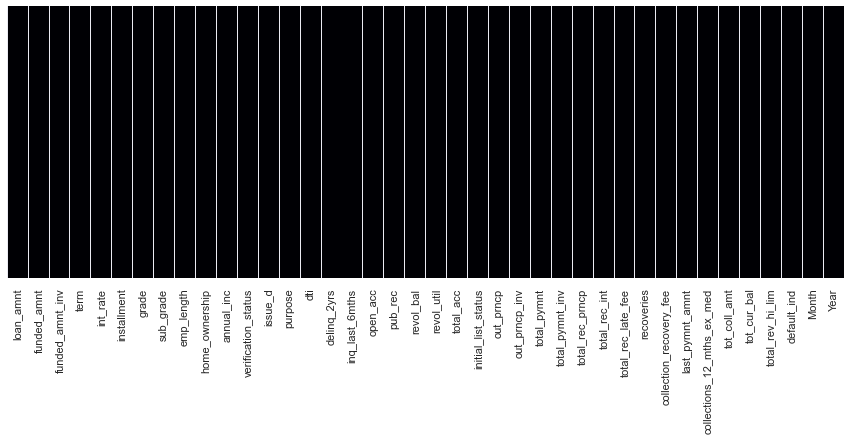

In [54]:
# Visualising the missing values in each column after dropping the variables

plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap="magma" )


# level 2 Export 

In [55]:
data.to_csv('level_2.csv')

In [56]:
import time

In [57]:
# Importing the dataset
start = time.time()

data_copy = pd.read_csv('level_2.csv',index_col=0,low_memory = False)
#index_col=0,header=None

end = time.time()
print(end - start)

9.46611499786377


In [58]:
data.shape

(855969, 40)

# emp_length ( 11 level)

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [59]:
data['emp_length'].value_counts()

10+ years    325151
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [60]:
data['emp_length'] = data['emp_length'].map({'< 1 year':0, '1 year':1, '2 years':2, 
                                                 '3 years':3, '4 years':4, '5 years':5, 
                                                 '6 years':6, '7 years':7, '8 years':8,
                                                 '9 years':9, '10+ years':10})

In [61]:
data['emp_length'].value_counts()

10    325151
2      75986
0      67597
3      67392
1      54855
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

In [62]:
data['emp_length'] = data['emp_length'].map({'< 1 year':0, '1 year':1, '2 years':2, 
                                                 '3 years':3, '4 years':4, '5 years':5, 
                                                 '6 years':6, '7 years':7, '8 years':8,
                                                 '9 years':9, '10+ years':10})

data['emp_length'].value_counts()

Series([], Name: emp_length, dtype: int64)

# term (2 level)¶

The number of payments on the loan. Values are in months and can be either 36 or 60.

In [63]:
data['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [64]:
# map function not working 
data['term'] = data['term'].replace({'36 months':1,'60 months':2},regex = True)

In [65]:
data['term'].value_counts()

1    600221
2    255748
Name: term, dtype: int64

# initial_list_status (2 level)

Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [66]:
data['initial_list_status'].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

In [67]:
data['initial_list_status'] = data['initial_list_status'].map({'f':1,'w':2})


In [68]:

data['initial_list_status'].value_counts()

1    442555
2    413414
Name: initial_list_status, dtype: int64

# verification_status (3 level)

In [69]:
data['verification_status'].value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

In [70]:
data['verification_status'] = data['verification_status'].map({'Source Verified':1,'Verified':2, 'Not Verified':3})

In [71]:
data['verification_status'].value_counts()

1    318178
2    280049
3    257742
Name: verification_status, dtype: int64

# home_ownership (6 level)

he home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [72]:
data['home_ownership'].value_counts()


MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [73]:
data['home_ownership'] = data['home_ownership'].map({'MORTGAGE':1,'RENT':2,'OWN':3,'OTHER':4,'NONE':5,'ANY':6})


In [74]:
data['home_ownership'].value_counts()


1    429106
2    342535
3     84136
4       144
5        45
6         3
Name: home_ownership, dtype: int64

# grade (7 level)


XYZ corp. assigned loan grade



In [75]:
data['grade'].value_counts()


B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

In [76]:
data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})


In [77]:
data['grade'].value_counts()


2    247998
3    236855
1    145665
4    132802
5     66448
6     21328
7      4873
Name: grade, dtype: int64

# purpose (14 level)¶


In [78]:
A category provided by the borrower for the loan request.



SyntaxError: invalid syntax (<ipython-input-78-654bf828c8ed>, line 1)

In [ ]:
data['purpose'].value_counts()


In [ ]:
data['purpose'] = data['purpose'].map({'debt_consolidation':1, 'credit_card':2, 
                                       'home_improvement':3, 'other':4, 'major_purchase':5, 
                                       'small_business':6, 'car':7, 'medical':8,
                                       'moving':9, 'vacation':10, 'house':11,'wedding':12,
                                       'renewable_energy':13,'educational':14})


In [ ]:
data['purpose'].value_counts()


# Variable Drop¶


In [ ]:
# sub_grade variable for trail purpose (35 level)
data=data.drop('sub_grade',axis=1)

data=data.drop('Month',axis=1)

data=data.drop( 'Year',axis=1)

data.shape


# Level 3 Export


In [ ]:
data.to_csv('level_3.csv')


In [ ]:
# Importing the dataset
data = pd.read_csv('level_3.csv',index_col=0, low_memory=False)


In [ ]:
data.shape


In [79]:
data.head(10)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
0,5000.0,5000.0,4975.0,1,10.65,162.87,2,B2,NaN,2,24000.0,2,Dec-2011,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,1,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,225.0,139766.0,32163.0,0,Dec,2011
1,2500.0,2500.0,2500.0,2,15.27,59.83,3,C4,NaN,2,30000.0,1,Dec-2011,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,1,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,225.0,139766.0,32163.0,1,Dec,2011
2,2400.0,2400.0,2400.0,1,15.96,84.33,3,C5,NaN,2,12252.0,3,Dec-2011,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,1,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,225.0,139766.0,32163.0,0,Dec,2011
3,10000.0,10000.0,10000.0,1,13.49,339.31,3,C1,NaN,2,49200.0,1,Dec-2011,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,1,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,225.0,139766.0,32163.0,0,Dec,2011
4,3000.0,3000.0,3000.0,2,12.69,67.79,2,B5,NaN,2,80000.0,1,Dec-2011,other,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,1,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,225.0,139766.0,32163.0,0,Dec,2011
5,5000.0,5000.0,5000.0,1,7.90,156.46,1,A4,NaN,2,36000.0,1,Dec-2011,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,1,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,225.0,139766.0,32163.0,0,Dec,2011
6,7000.0,7000.0,7000.0,2,15.96,170.08,3,C5,NaN,2,47004.0,3,Dec-2011,debt_consolidation,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,1,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,170.08,0.0,225.0,139766.0,32163.0,0,Dec,2011
7,3000.0,3000.0,3000.0,1,18.64,109.43,5,E1,NaN,2,48000.0,1,Dec-2011,car,5.35,0.0,2.0,4.0,0.0,8221.0,87.5,4.0,1,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.00,111.34,0.0,225.0,139766.0,32163.0,0,Dec,2011
8,5600.0,5600.0,5600.0,2,21.28,152.39,6,F2,NaN,3,40000.0,1,Dec-2011,small_business,5.55,0.0,2.0,11.0,0.0,5210.0,32.6,13.0,1,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,152.39,0.0,225.0,139766.0,32163.0,1,Dec,2011
9,5375.0,5375.0,5350.0,2,12.69,121.45,2,B5,NaN,2,15000.0,2,Dec-2011,other,18.08,0.0,0.0,2.0,0.0,9279.0,36.5,3.0,1,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,121.45,0.0,225.0,139766.0,32163.0,1,Dec,2011


Data Partition¶
train --> ( June 2007 – May 2015 )

test --> ( June 2015 – Dec 2015 )

So I have decided to treat the date column(‘issue_d’).First, I split the column(‘issue_d’) into two different columns and replace the values as my requirement.After that with the help of map function I joined the splited columns and make them one with different name (‘period’). Then I sort the ‘period’ column and make it an index for slicing according to the requirement



In [80]:
data['str_split'] = data.issue_d.str.split('-')

data['m'] = data.str_split.str.get(0)

data['y']=data.str_split.str.get(1)

data['m'] = data['m'].replace({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                                              'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                                  ,regex = True)

data["period"] = data["y"].map(str) + data["m"]

data_sort = data.sort_values('period')




In [81]:
data_sort.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year,str_split,m,y,period
39693,7500.0,7500.0,800.0,1,13.75,255.43,5,E2,NaN,3,22000.0,3,Jun-2007,debt_consolidation,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0,Jun,2007,"[Jun, 2007]",06,2007,200706
39671,5000.0,5000.0,4150.0,1,7.43,155.38,1,A2,NaN,1,150000.0,3,Jul-2007,home_improvement,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0,Jul,2007,"[Jul, 2007]",07,2007,200707
39659,5750.0,5750.0,3675.0,1,7.43,178.69,1,A2,NaN,1,125000.0,3,Jul-2007,debt_consolidation,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0,Jul,2007,"[Jul, 2007]",07,2007,200707
39660,5000.0,5000.0,3975.0,1,7.43,155.38,1,A2,NaN,2,40000.0,3,Jul-2007,car,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0,Jul,2007,"[Jul, 2007]",07,2007,200707
39666,1200.0,1200.0,0.0,1,11.54,39.60,3,C5,NaN,2,20000.0,3,Jul-2007,credit_card,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0,Jul,2007,"[Jul, 2007]",07,2007,200707


In [82]:
data_sort_index = data_sort.set_index('period')


In [83]:
data_sort_index.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year,str_split,m,y
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,1,13.75,255.43,5,E2,NaN,3,22000.0,3,Jun-2007,debt_consolidation,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0,Jun,2007,"[Jun, 2007]",06,2007
200707,5000.0,5000.0,4150.0,1,7.43,155.38,1,A2,NaN,1,150000.0,3,Jul-2007,home_improvement,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0,Jul,2007,"[Jul, 2007]",07,2007
200707,5750.0,5750.0,3675.0,1,7.43,178.69,1,A2,NaN,1,125000.0,3,Jul-2007,debt_consolidation,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0,Jul,2007,"[Jul, 2007]",07,2007
200707,5000.0,5000.0,3975.0,1,7.43,155.38,1,A2,NaN,2,40000.0,3,Jul-2007,car,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0,Jul,2007,"[Jul, 2007]",07,2007
200707,1200.0,1200.0,0.0,1,11.54,39.60,3,C5,NaN,2,20000.0,3,Jul-2007,credit_card,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0,Jul,2007,"[Jul, 2007]",07,2007


# Droping the irrevelent columns¶


In [84]:
# issue_d
data_sort_index=data_sort_index.drop('issue_d',axis=1)

# str_split
data_sort_index=data_sort_index.drop('str_split',axis=1)

# m
data_sort_index=data_sort_index.drop('m',axis=1)

# y
data_sort_index=data_sort_index.drop('y',axis=1)

data_sort_index.shape


data_sort_index.head(15)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,1,13.75,255.43,5,E2,NaN,3,22000.0,3,debt_consolidation,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.00000,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0,Jun,2007
200707,5000.0,5000.0,4150.0,1,7.43,155.38,1,A2,NaN,1,150000.0,3,home_improvement,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.00000,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0,Jul,2007
200707,5750.0,5750.0,3675.0,1,7.43,178.69,1,A2,NaN,1,125000.0,3,debt_consolidation,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.00000,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0,Jul,2007
200707,5000.0,5000.0,3975.0,1,7.43,155.38,1,A2,NaN,2,40000.0,3,car,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.00000,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0,Jul,2007
200707,1200.0,1200.0,0.0,1,11.54,39.60,3,C5,NaN,2,20000.0,3,credit_card,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.00000,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0,Jul,2007
200707,12250.0,12250.0,1525.0,1,10.59,398.69,3,C2,NaN,2,60000.0,3,small_business,17.12,1.0,2.0,10.0,0.0,17214.0,8.1,24.0,1,0.0,0.0,13128.80,1634.39,12250.0,878.80,0.00000,0.0,0.0,9939.88,0.0,225.0,139766.0,32163.0,0,Jul,2007
200707,2700.0,2700.0,550.0,1,15.96,94.88,6,F4,NaN,2,52200.0,3,debt_consolidation,12.57,0.0,1.0,12.0,0.0,3075.0,92.3,13.0,1,0.0,0.0,3415.00,695.54,2700.0,715.00,0.00000,0.0,0.0,96.40,0.0,225.0,139766.0,32163.0,0,Jul,2007
200707,5000.0,5000.0,1775.0,1,9.01,159.03,2,B2,NaN,1,250000.0,3,other,10.00,2.0,0.0,5.0,0.0,14354.0,36.6,7.0,1,0.0,0.0,5724.82,2032.29,5000.0,724.82,0.00000,0.0,0.0,160.61,0.0,225.0,139766.0,32163.0,0,Jul,2007
200707,3500.0,3500.0,1200.0,1,9.96,112.87,2,B5,NaN,2,13500.0,3,educational,16.44,0.0,1.0,10.0,0.0,2864.0,41.1,16.0,1,0.0,0.0,3941.83,1351.44,3500.0,441.83,0.00000,0.0,0.0,1798.54,0.0,225.0,139766.0,32163.0,0,Jul,2007


# Level 4 Export

In [85]:
data_sort_index.to_csv('level_4.csv')


In [86]:
# Importing the dataset
data = pd.read_csv('level_4.csv',index_col=0,low_memory=False)


In [87]:
data.shape


(855969, 39)

# As per the requirement i have sliced the data in train and test.¶
Train

In [88]:
train_data = data.loc['200706':'201505',:]

In [89]:
train_data.shape


(598978, 39)

In [90]:
train_data.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,1,13.75,255.43,5,E2,NaN,3,22000.0,3,debt_consolidation,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0,Jun,2007
200707,5000.0,5000.0,4150.0,1,7.43,155.38,1,A2,NaN,1,150000.0,3,home_improvement,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0,Jul,2007
200707,5750.0,5750.0,3675.0,1,7.43,178.69,1,A2,NaN,1,125000.0,3,debt_consolidation,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0,Jul,2007
200707,5000.0,5000.0,3975.0,1,7.43,155.38,1,A2,NaN,2,40000.0,3,car,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0,Jul,2007
200707,1200.0,1200.0,0.0,1,11.54,39.60,3,C5,NaN,2,20000.0,3,credit_card,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0,Jul,2007


In [91]:
train_data.tail()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505,8800.0,8800.0,8800.0,1,10.99,288.06,2,B4,NaN,1,20000.0,2,debt_consolidation,4.44,1.0,0.0,6.0,0.0,2309.0,19.7,16.0,1,7086.08,7086.08,2293.73,2293.73,1713.92,579.81,0.0,0.0,0.0,288.06,0.0,0.0,72575.0,11700.0,0,May,2015
201505,12000.0,12000.0,12000.0,1,6.39,367.19,1,A2,NaN,1,69000.0,3,debt_consolidation,16.78,0.0,0.0,9.0,0.0,3560.0,9.5,17.0,1,9527.97,9527.97,2933.26,2933.26,2472.03,461.23,0.0,0.0,0.0,367.19,0.0,0.0,129286.0,37500.0,0,May,2015
201505,16000.0,16000.0,16000.0,1,6.92,493.45,1,A4,NaN,1,165000.0,3,debt_consolidation,12.83,0.0,0.0,24.0,0.0,24827.0,28.3,43.0,1,12725.00,12725.00,3941.45,3941.45,3275.00,666.45,0.0,0.0,0.0,493.45,0.0,321.0,236729.0,87800.0,0,May,2015
201505,10000.0,10000.0,10000.0,1,6.92,308.41,1,A4,NaN,1,45000.0,3,home_improvement,27.95,0.0,1.0,7.0,1.0,527.0,8.5,28.0,2,7953.10,7953.10,2459.59,2459.59,2046.90,412.69,0.0,0.0,0.0,308.41,0.0,0.0,134074.0,6200.0,0,May,2015
201505,5000.0,5000.0,5000.0,1,6.92,154.21,1,A4,NaN,1,20000.0,3,credit_card,26.35,0.0,1.0,10.0,1.0,6223.0,38.9,37.0,2,0.00,0.00,5129.80,5129.80,5000.00,129.80,0.0,0.0,0.0,4669.09,0.0,0.0,129224.0,16000.0,0,May,2015


# Test¶


In [92]:
test_data = data.loc['201506':'201512',:]


In [93]:
test_data.shape


(256991, 39)

In [94]:
test_data.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201506,35000.0,35000.0,35000.0,1,9.17,1115.77,2,B2,NaN,1,130000.0,2,debt_consolidation,26.59,0.0,0.0,25.0,0.0,45846.0,65.0,44.0,2,28923.94,28923.94,7792.56,7792.56,6076.06,1716.50,0.0,0.0,0.0,1115.77,0.0,0.0,227294.0,70500.0,0,Jun,2015
201506,11500.0,11500.0,11475.0,2,9.17,239.68,2,B2,NaN,2,74000.0,1,debt_consolidation,23.61,0.0,0.0,7.0,0.0,20480.0,61.1,11.0,2,10571.62,10548.63,1432.22,1429.11,928.38,503.84,0.0,0.0,0.0,239.68,0.0,0.0,56802.0,33500.0,0,Jun,2015
201506,12000.0,12000.0,12000.0,2,15.61,289.34,4,D1,NaN,2,48000.0,1,debt_consolidation,31.40,0.0,1.0,9.0,0.0,15264.0,74.8,23.0,2,11174.11,11174.11,1725.63,1725.63,825.89,899.74,0.0,0.0,0.0,289.34,0.0,0.0,60872.0,20400.0,0,Jun,2015
201506,35000.0,35000.0,35000.0,1,12.29,1167.36,3,C1,NaN,1,121000.0,2,debt_consolidation,22.18,3.0,0.0,10.0,0.0,27999.0,76.9,35.0,2,29160.72,29160.72,8167.03,8167.03,5839.28,2327.75,0.0,0.0,0.0,1167.36,0.0,0.0,277104.0,36400.0,0,Jun,2015
201506,27000.0,27000.0,27000.0,2,8.18,549.80,2,B1,NaN,1,100000.0,1,credit_card,18.73,0.0,0.0,16.0,0.0,28486.0,61.0,39.0,2,24386.79,24386.79,3824.06,3824.06,2613.21,1210.85,0.0,0.0,0.0,549.80,0.0,0.0,209664.0,46700.0,0,Jun,2015


In [95]:
test_data.tail()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201512,14400.0,14400.0,14400.0,1,11.99,478.22,3,C1,NaN,2,57000.0,2,debt_consolidation,22.15,0.0,0.0,9.0,0.0,9751.0,75.0,13.0,1,14065.66,14065.66,459.04,459.04,334.34,124.70,0.0,0.0,0.0,478.22,0.0,0.0,35418.0,13000.0,0,Dec,2015
201512,20000.0,20000.0,20000.0,1,5.32,602.30,1,A1,NaN,1,99000.0,3,credit_card,12.61,0.0,0.0,11.0,0.0,18184.0,33.4,19.0,2,19486.37,19486.37,596.39,596.39,513.63,82.76,0.0,0.0,0.0,602.30,0.0,0.0,35828.0,54400.0,0,Dec,2015
201512,12000.0,12000.0,12000.0,2,13.67,277.18,3,C4,NaN,2,40000.0,2,debt_consolidation,30.30,0.0,1.0,10.0,0.0,12113.0,57.7,20.0,2,11859.52,11859.52,268.07,268.07,140.48,127.59,0.0,0.0,0.0,277.18,0.0,0.0,66850.0,21000.0,0,Dec,2015
201512,35000.0,35000.0,35000.0,1,11.22,1149.51,2,B5,NaN,2,120000.0,1,home_improvement,2.82,0.0,0.0,11.0,0.0,4801.0,18.6,22.0,2,34177.74,34177.74,1127.69,1127.69,822.26,305.43,0.0,0.0,0.0,1149.51,0.0,0.0,9224.0,25800.0,0,Dec,2015
201512,34500.0,34500.0,34500.0,2,15.41,828.20,4,D1,NaN,2,76000.0,1,debt_consolidation,25.92,0.0,0.0,18.0,0.0,44978.0,75.1,47.0,2,34114.84,34114.84,798.66,798.66,385.16,413.50,0.0,0.0,0.0,828.20,0.0,0.0,47896.0,59900.0,0,Dec,2015


# Export train data and test data¶


In [96]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')


In [97]:
train_data.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind', 'Month', 'Year'],
      dtype='object')

In [98]:
x_cols=[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']]

y_cols = [['default_ind']]


# Seprate featrues and labels¶


In [99]:
#x_train=train_data.iloc[:,:-1]


In [100]:
x_train = pd.DataFrame(train_data.values[:,:-1],columns=x_cols)
# x_train = train_data.iloc[:,:-1]


AssertionError: Number of manager items must equal union of block items
# manager items: 35, # tot_items: 38

In [ ]:
x_train.head()


In [ ]:
y_train = pd.DataFrame(train_data.values[:,-1],columns=y_cols)

#y_train = train_data.iloc[:,-1]


In [ ]:
y_train.head()
# type(y_train) pandas.core.series.Series


# Test¶


In [ ]:
x_test = pd.DataFrame(test_data.values[:,:-1],columns=x_cols)
#x_test = test_data.iloc[:,:-1]

x_test.head()
# type(x_test) pandas.core.frame.DataFrame


In [ ]:
x_test = pd.DataFrame(test_data.values[:,:-1],columns=x_cols)
#x_test = test_data.iloc[:,:-1]

x_test.head()
# type(x_test) pandas.core.frame.DataFrame


In [101]:
type(y_test)


NameError: name 'y_test' is not defined

In [102]:
type(y_test)


NameError: name 'y_test' is not defined

# Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_scale = pd.DataFrame(sc.fit_transform(x_train),columns=x_cols)
x_test_scale = pd.DataFrame(sc.transform(x_test),columns=x_cols)


In [ ]:
x_train_scale.head(10)


In [ ]:
x_test_scale.head()


# Export all files


In [ ]:
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
x_train_scale.to_csv('x_train_scale.csv')
x_test_scale.to_csv('x_test_scale.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')


# Model Building¶ Custom function for Confusion matrix


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def plot_confusion_metrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """this function prints and plot the confusion matirx
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Decision Tree


In [ ]:
# import the scale data set

x_train = pd.read_csv('x_train.csv',index_col=0)
x_test = pd.read_csv('x_test.csv',index_col=0)
y_train = pd.read_csv('y_train.csv',index_col=0)
y_test = pd.read_csv('y_test.csv',index_col=0)


# import the scale data set

x_train_scale = pd.read_csv('x_train_scale.csv',index_col=0)
x_test_scale = pd.read_csv('x_test_scale.csv',index_col=0)


In [ ]:
%%
#Running Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_features=8,random_state=0,)
model_DecisionTree.fit(x_train_scale,y_train)

#fit the model on the data and predict the values 

y_pred = model_DecisionTree.predict(x_test_scale)


In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)


# ANN¶


In [ ]:
sns.countplot('default_ind', data=train_data)

plt.title('Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')


In [ ]:
nd = round(train_data['default_ind'].value_counts()[0]/len(train_data) * 100, 2)

d = round(train_data['default_ind'].value_counts()[1]/len(train_data) * 100, 2)

print('Non_Default Customer : {} % of the dataset'.format(nd))
print('Default Customer : {} % of the dataset'.format(d))


In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


# Deep Learning Model on Un-Balanced Data set


In [ ]:
# Importing the keras libraries and package

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 19, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 35))


# Adding the second hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
# classifier.add(Dropout(p = 0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

'''# Adding the fourth hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))'''


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))


In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])


In [ ]:
 #Fitting the ANN to the Training set

classifier.fit(x_train, y_train, batch_size = 100, epochs = 10)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)


In [ ]:
y_pred

In [ ]:
y_pred = (y_pred > 0.5)


In [ ]:
y_pred


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)


# Deep Learning Model on Balanced Data set


In [124]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_sample(x_train_scale,y_train)

x_resample


ModuleNotFoundError: No module named 'imblearn'

In [ ]:
x_cols=[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']]

y_cols = [['default_ind']]


In [ ]:
x = pd.DataFrame(x_resample, columns=x_cols)
y = pd.DataFrame(y_resample, columns=y_cols)


In [ ]:
data = pd.concat([x, y], axis = 1)


In [ ]:
data.shape


In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 19, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 35))


# Adding the second hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
# classifier.add(Dropout(p = 0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

'''# Adding the fourth hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))'''


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))


In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])


In [ ]:
# Fitting the ANN to the Training set

classifier.fit(x_resample, y_resample, batch_size = 100, epochs = 10)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test_scale)


In [ ]:
y_pred

In [ ]:
y_pred = (y_pred > 0.5)


In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)


# Creating another dataframe with new variables¶


In [ ]:
data=pd.read_csv('XYZCorp_LendingData.txt',header=0 ,
                      delimiter="\t", low_memory=False)

data.shape   #(855969, 73)


In [ ]:
#Feature Selection
# Out of 73 , few variables are not helpful or impactful in order to build a predictive model, hence dropping.

data.drop(['id','member_id','funded_amnt_inv','grade','emp_title','pymnt_plan','desc','title','addr_state',
            'inq_last_6mths','mths_since_last_record','initial_list_status','mths_since_last_major_derog','policy_code',
            'dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m'
            ,'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m',
            'max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m'],axis=1,inplace=True)

data.shape #(855969, 41)


In [ ]:
# Checking if missing values are present and datatype of each variable.
data.isnull().sum()


In [ ]:
# Imputing missing data for categorical variable with mode value

colname1=['term','sub_grade','emp_length','home_ownership','verification_status',
          'issue_d','purpose','zip_code','earliest_cr_line','last_pymnt_d',
          'next_pymnt_d','last_credit_pull_d']
for x in colname1[:]:
     data[x].fillna(data[x].mode()[0],inplace=True)
    
data.isnull().sum()


In [ ]:
# Imputing missing data for Numerical with mean value / Zeros 
data['annual_inc_joint'].fillna(0,inplace=True)

colname2=['mths_since_last_delinq','revol_util','collections_12_mths_ex_med',
          'total_rev_hi_lim']
for x in colname2[:]:
    data[x].fillna(data[x].mean(),inplace=True)
    
data.isnull().sum()
data.shape


In [ ]:
v# Label Encoding - to label all categorical variable value with numeric value
#Label will get assigned in Ascending alphabetical of variable value

colname1=['term','sub_grade','emp_length','home_ownership','verification_status',
          'purpose','zip_code','earliest_cr_line','last_pymnt_d',
          'next_pymnt_d','last_credit_pull_d','application_type']

data.head()
from sklearn import preprocessing

le={}

for x in colname1:
     le[x]=preprocessing.LabelEncoder()

for x in colname1:
     data[x]=le[x].fit_transform(data[x])
data.head()


In [ ]:
#Train and Test split

# issue_d is object datatype to make use for split converting issue_d in Date

data.issue_d = pd.to_datetime(data.issue_d)   #%y-%m-%d
col_name = 'issue_d'
print (data[col_name].dtype)

#split data in train and test

split_date = "2015-05-01"

train = data.loc[data['issue_d'] <= split_date]
train=train.drop(['issue_d'],axis=1)
#train.head()
train.shape    #(598978, 40)

test = data.loc[data['issue_d'] > split_date]
test=test.drop(['issue_d'],axis=1)
#test.head()
test.shape  #(256991, 40)


In [ ]:
train.head()


In [ ]:
test.head()


In [ ]:
#selecting X and Y

X_train=train.values[:,:-1]
Y_train=train.values[:,-1]
Y_train=Y_train.astype(int)
print(Y_train)

X_test=test.values[:,:-1]
Y_test=test.values[:,-1]
Y_test=Y_test.astype(int)
print(Y_test)


# Decision_Tree_Classifier

In [ ]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier()
model_DecisionTree.fit(X_train,Y_train)

#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)


In [ ]:
#checking result
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)
